### 3.11 Przy użyciu zbiór danych Movie Lens przedstawionego przy
poprzedniej liście zadań, należy zwizualizować dane wypisane w
poniższych podpunktach. Pamiętaj, że w "prawdziwym życiu" często te
wykresy będziesz prezentować komuś innemu - zadbaj o odpowiednie
tytuły wykresów, nazwy osi i inne rzeczy poprawiające czytelność i
zrozumienie wykresu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movies = pd.read_csv('movies.dat', sep="::", header = None)
movies.columns = ["MovieID","Title","Genres"]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
ratings = pd.read_csv('ratings.dat', sep="::", header = None)
ratings.columns = ["UserID","MovieID","Rating","Timestamp"]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
users = pd.read_csv('users.dat', sep="::", header = None)
users.columns = ["UserID", "Gender", "Age", "Occupation", "Zip-code"]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
import re
m = [re.search("\w+\s\((\d{4})\)",movie) for movie in movies.Title]
years = [year.group(1) if year != None else 0 for year in m   ]
movies["Year"] = years
movies.head()

,MovieID,Title,Genres,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### A ile filmów powstało w poszczególnych latach (w dwóch wersjach) 

### Histogram

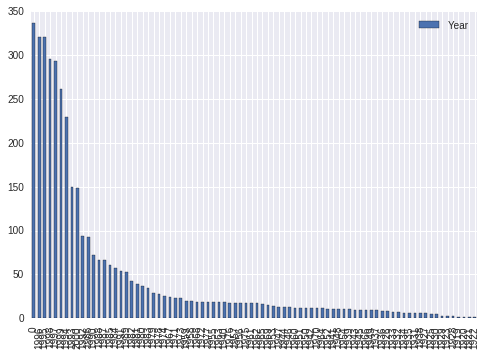

In [32]:
plt.figure();
year_cnt = movies.Year.value_counts()
year_cnt.columns = ["Year","Count"]
year_cnt.plot(x='Year', y='Count', kind='bar', legend=True)
plt.show()

### Pie chart

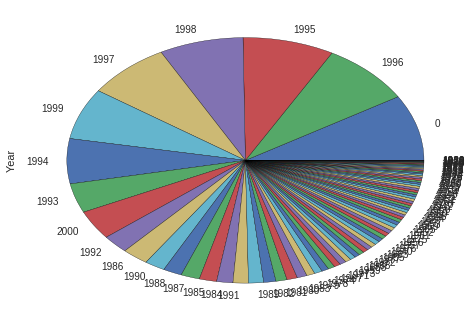

In [34]:
year_cnt.plot(kind='pie')
plt.show()

### B liczba kobiet vs liczba mężczyzn

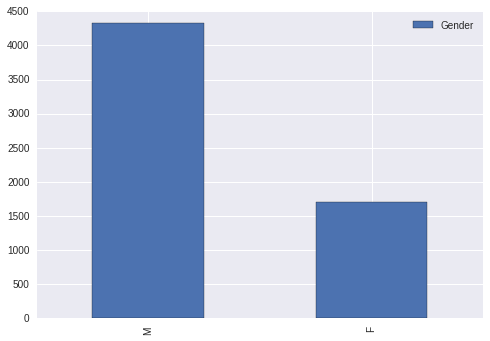

In [46]:
gender = users.Gender.value_counts()
gender.plot(kind='bar', legend=True)
plt.show()

### C częstość gatunków filmowych

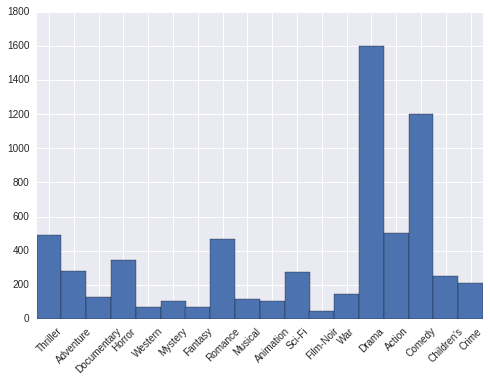

In [52]:
all_geners = [m.split("|") for m in movies.Genres]
all_geners = [ x for y in all_geners for x in y]
from collections import Counter
occurances = Counter(all_geners)
labels, values = zip(*occurances.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=45)
plt.show()

### D rozkład ocen kobiet i mężczyzn

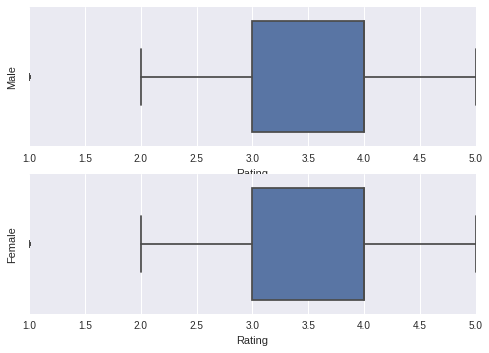

In [65]:
result_user = pd.merge(users, ratings, on='UserID')
result_user_movie = pd.merge(result_user, movies, on='MovieID')
dfs = [rows for _, rows in result_user_movie.groupby('Gender')]
female = dfs[0]
male = dfs[1]
fig, axs = plt.subplots(2)
sns.boxplot(male.Rating,ax=axs[0])
sns.boxplot(female.Rating,ax=axs[1])
axs[0].set_ylabel('Male')
axs[1].set_ylabel('Female')
plt.show()

### E rozkład ocen dla poszczególnych gatunków

In [80]:
movie_genre = pd.DataFrame.from_dict(occurances, orient='index').reset_index()
movie_genre = movie_genre.rename(columns={'index':'Genre', 0:'Count'})
print(movie_genre.head())
result_user_movie.tail()

         Genre  Count
0     Thriller    492
1    Adventure    283
2  Documentary    127
3       Horror    343
4      Western     68


,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,Year
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary,1998
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama,1998
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama,1999
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western,1973
1000208,5938,M,25,1,35401,2909,4,957273353,"Five Wives, Three Secretaries and Me (1998)",Documentary,1998


In [96]:
genres_dict={}
for x in movie_genre.Genre:
    genres_dict[x]=[] 
print(genres_dict)
for y,z in zip(result_user_movie.Genres,result_user_movie.Rating): 
    for x in movie_genre.Genre: 
        if x in y:
            genres_dict[x].append(z)
#genres_dict

{'Thriller': [], 'Adventure': [], 'Documentary': [], 'Horror': [], 'Drama': [], 'Mystery': [], 'Fantasy': [], 'Romance': [], 'Musical': [], 'Animation': [], 'Western': [], 'War': [], 'Sci-Fi': [], 'Action': [], 'Comedy': [], "Children's": [], 'Film-Noir': [], 'Crime': []}


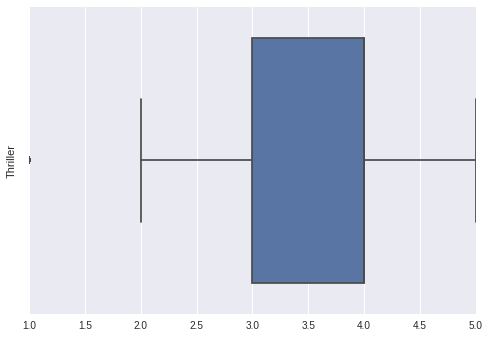

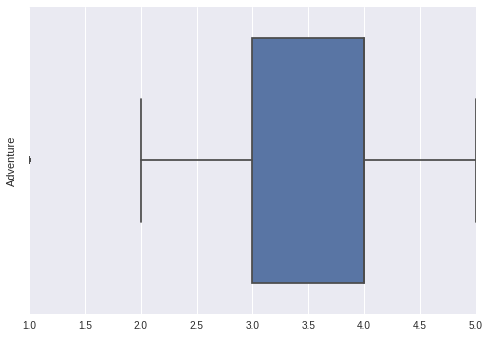

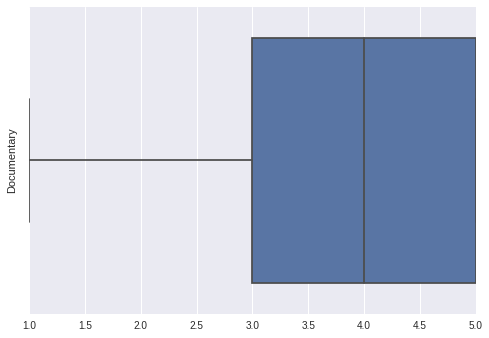

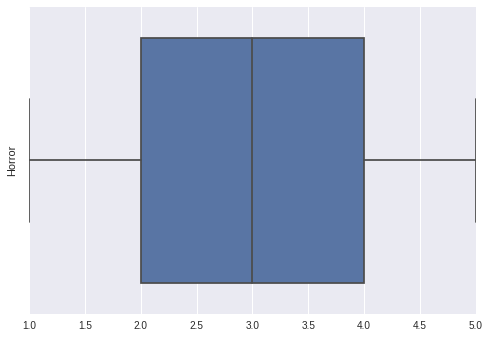

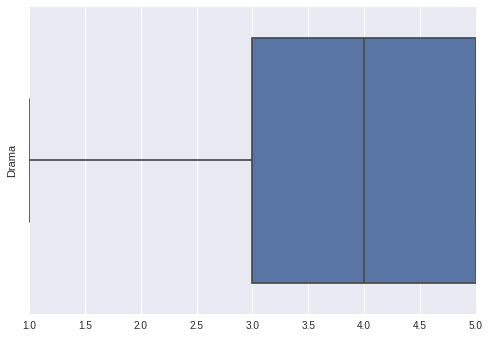

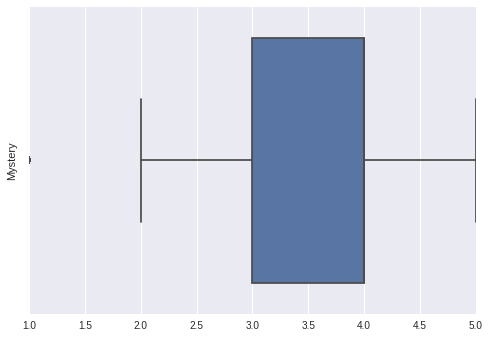

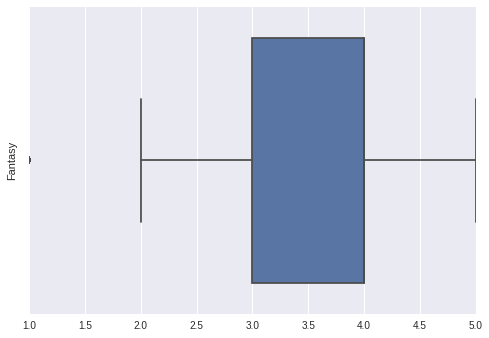

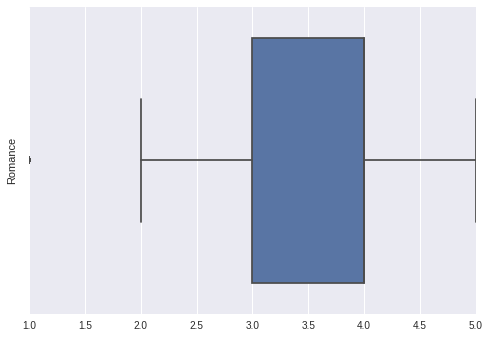

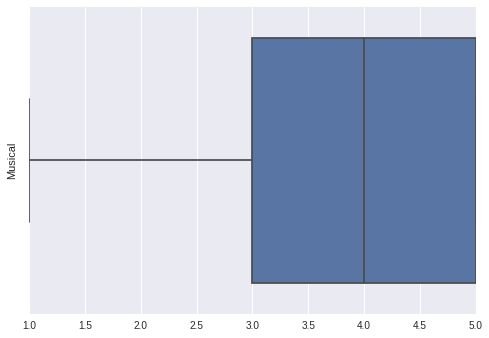

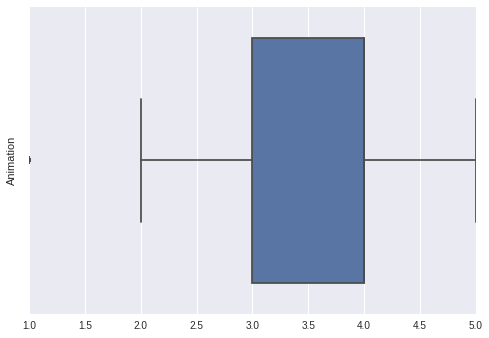

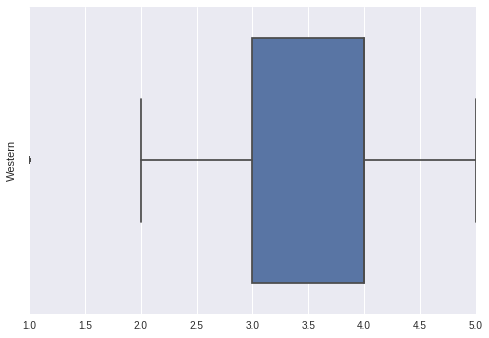

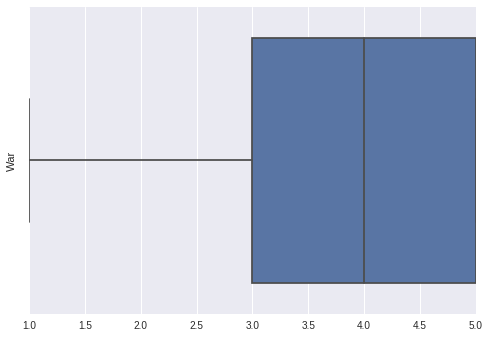

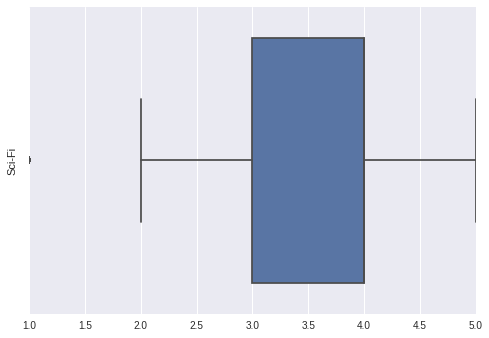

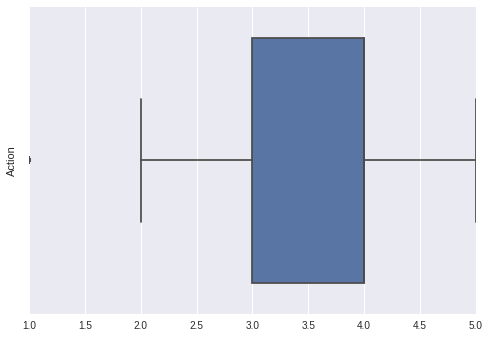

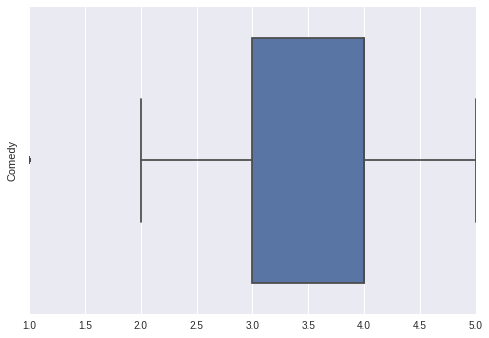

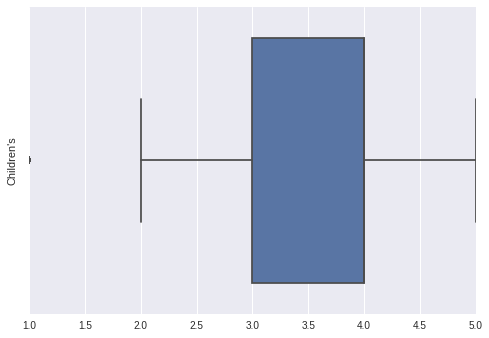

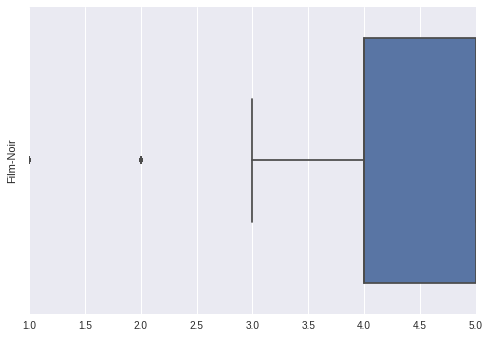

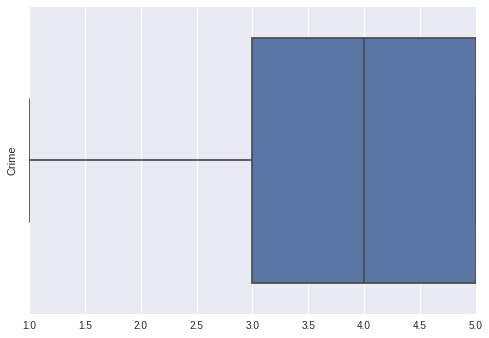

In [106]:
i = 0
#fig, axs = plt.subplots(len(genres_dict))
for genre in genres_dict:
    sns.boxplot(genres_dict[genre]).set_ylabel(genre)
    plt.show()

In [117]:
result_user_movie.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres,Year
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,1975


In [2]:
#genre_rating = pd.DataFrame(result_user_movie,columns=["Rating","Genres"])
#genre_rating.head()
#genre_rating = np.random.choice(genre_rating.Genres,300)
#duplicate_genre = genre_rating["Genres"].str.split("|").apply(pd.Series,1).stack()
#duplicate_genre

### F rozkład liczby oddanych głosów na filmy

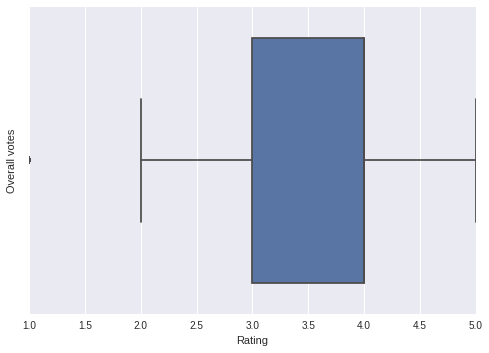

In [107]:
sns.boxplot(result_user_movie.Rating).set_ylabel('Overall votes')
plt.show()

In [111]:
result = pd.merge(movies, ratings, on='MovieID')
cnt = Counter(list(result.Title))
movie_occ = pd.DataFrame.from_dict(cnt, orient='index').reset_index()
movie_occ = movie_occ.rename(columns={'index':'Title', 0:'Count'})

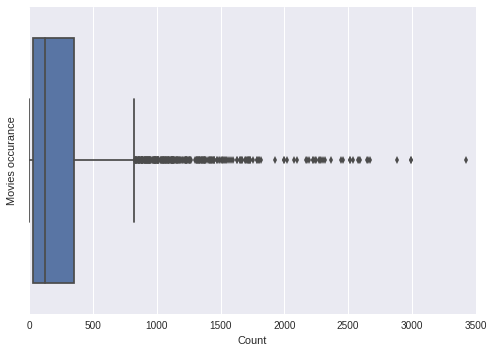

In [127]:
movie_occ.head()
sns.boxplot(movie_occ.Count).set_ylabel('Movies occurance')
plt.show()

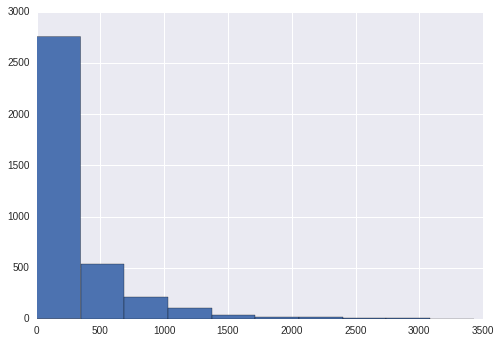

In [116]:
movie_occ.Count.hist()
plt.show()